# Get the Diurnal R,G,B Cycle for the Images

We want to see if there's a general correspondence between time of day and image color. The location of the Sun in the sky might be a reason we would expect to see consistent color patterns over the course of a day. For example, during dusk and dawn the image might appear more blue. If we can anticipate the degree to which the time of day influences the image color, we can remove some of these effects and characterize how image color departs from the diurnal patterns. 

In [1]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import glob
from natsort import natsorted, ns
from PIL import Image
from PIL.ExifTags import TAGS

import pandas as pd

ss_row_start = 1000
ss_row_end = 1200
ss_col_start = 1000
ss_col_end = 1500

In [2]:
# Set photo location
image_path = '/Users/lejoflores/zoe_camtrap_images/'

In [3]:
file_list = glob.glob(image_path+'*.JPG')

file_list = natsorted(file_list)

n_images = len(file_list)
n_images

1304

In [4]:
RGB_avg = np.zeros((n_images,3))
image_datetime = np.empty(n_images, dtype='datetime64[s]')

In [5]:
counter = 0

for file in file_list:
    
    image = ski.io.imread(file)
    
    #image_ss = image[ss_row_start:ss_row_end,ss_col_start:ss_col_end,:]
    
    RGB_avg[counter,:] = np.mean(image, axis=(0,1))

    # Use Pillow Image operator to get the EXIF header data from the image
    exifdata = Image.open(file).getexif()
    
    # Get the DateTime tag from the EXIF data
    datetime_tag = exifdata.get(306) 
    
    # EXIF DateTime tags are weird in that the date is denoted YYYY:MM:DD
    # Numpy nor pandas recognize ':' as a valid delimiter of dates, so use the
    # Python string replace operator to replace the first two ':'s with '-'s 
    datetime_tag = datetime_tag.replace(':','-',2)
    
    # Convert the datetime_tag from a string to a datetime64 object
    this_image_datetime = np.datetime64(datetime_tag)
    
    # Store the datetime object for this image into the array for all images
    image_datetime[counter] = this_image_datetime
       
    counter += 1

In [23]:
'DCEW_LW_cam_'+datetime_tag.replace(' ','T').replace(':','',2)+'-07'+'.JPG'

'DCEW_LW_cam_2023-12-05T144500-07.JPG'

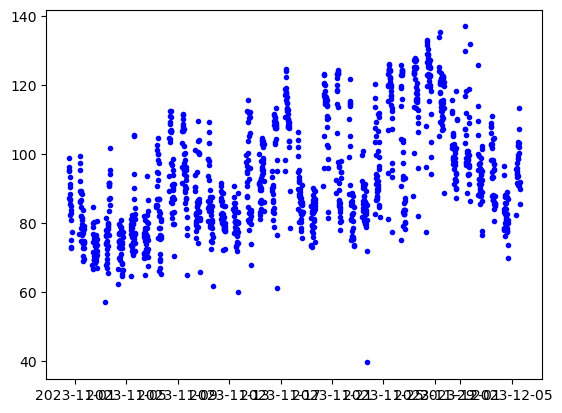

In [6]:
plt.plot(image_datetime, RGB_avg[:,2],'b.')

In [7]:
df_camtrap = pd.DataFrame({'Datetime': pd.to_datetime(image_datetime),
                           'R_avg': RGB_avg[:,0],
                           'G_avg': RGB_avg[:,1],
                           'B_avg': RGB_avg[:,2]})
df_camtrap

,Datetime,R_avg,G_avg,B_avg
0,2023-10-31 12:45:00,96.646360,95.148458,87.373011
1,2023-10-31 13:00:00,101.410080,102.158163,96.389069
2,2023-10-31 13:15:00,100.133644,100.949479,94.977569
3,2023-10-31 13:30:00,110.073076,108.298019,98.983701
4,2023-10-31 13:45:00,109.505401,106.512719,95.492475
...,...,...,...,...
1299,2023-12-05 13:45:00,95.248234,96.989712,91.595007
1300,2023-12-05 14:00:00,104.019965,101.883309,90.772055
1301,2023-12-05 14:15:00,108.344813,104.551945,89.910313
1302,2023-12-05 14:30:00,115.368895,109.899276,91.942963


In [8]:
df_camtrap.set_index('Datetime',inplace=True)
df_camtrap

,R_avg,G_avg,B_avg
Datetime,,,
2023-10-31 12:45:00,96.646360,95.148458,87.373011
2023-10-31 13:00:00,101.410080,102.158163,96.389069
2023-10-31 13:15:00,100.133644,100.949479,94.977569
2023-10-31 13:30:00,110.073076,108.298019,98.983701
2023-10-31 13:45:00,109.505401,106.512719,95.492475
...,...,...,...
2023-12-05 13:45:00,95.248234,96.989712,91.595007
2023-12-05 14:00:00,104.019965,101.883309,90.772055
2023-12-05 14:15:00,108.344813,104.551945,89.910313


In [9]:
df_diurnal = df_camtrap.groupby(df_camtrap.index.strftime('%H:%M')).mean()
df_diurnal

,R_avg,G_avg,B_avg
Datetime,,,
08:00,79.458209,87.057354,90.003114
08:15,87.713334,95.229509,97.149307
08:30,93.258415,99.490901,99.401848
08:45,98.280276,102.382195,99.446485
09:00,97.452679,102.284939,100.259412
09:15,99.324405,102.717030,98.990204
09:30,98.911967,101.675513,97.487344
09:45,100.869219,103.489754,99.454995
10:00,101.045338,103.292035,98.734827


## To-do next:

1. Plot diurnal cycles with multi-index
2. Tile diurnal cycle in data frame
3. Calculate deviations from diurnal mean
4. Come up with more sophisticated way to capture diurnal cycles in sun twilight
5. Bring in HOBO data


<Axes: xlabel='Datetime'>

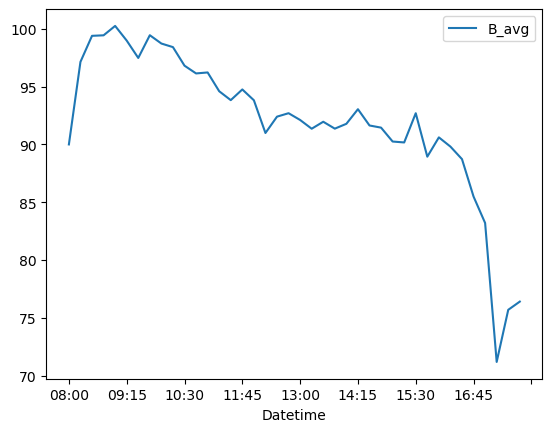

In [10]:
df_diurnal.plot(y='B_avg')

In [70]:
df_camtrap.groupby(df_camtrap.index.strftime('%H:%M')).groups

AttributeError: 'PrettyDict' object has no attribute 'shape'

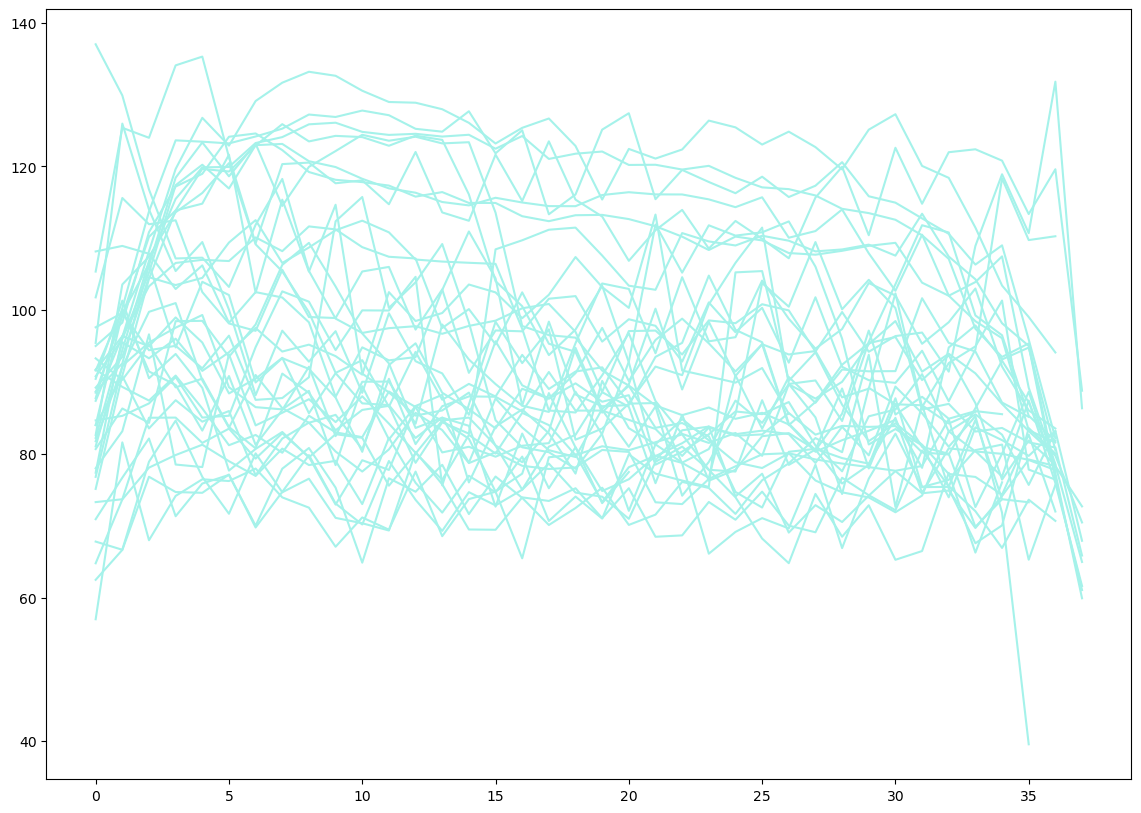

In [94]:
fig, ax = plt.subplots(figsize=(14,10))

for label,df in df_camtrap.groupby(df_camtrap.index.date):
    meanBlue = df['B_avg'].values
    x = np.arange(meanBlue.size)
    ax.plot(x,meanBlue, color='#a5f2ea')



In [85]:
meanBlue.shape

TypeError: 'tuple' object is not callable